# DBSCAN (Density-Based Spatial Clustering of Application with Noise)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Pairwise squared distance

In [2]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 7]
])
X.shape

(3, 2)

## 2. DBSCAN from scratch

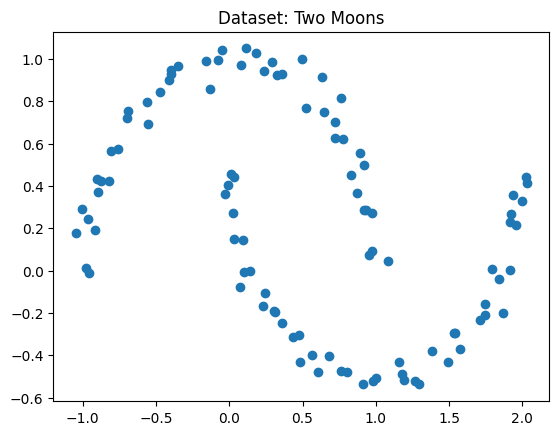

In [3]:
from sklearn.datasets import make_moons

X = make_moons(n_samples=100, noise=0.05, random_state=0)[0]

plt.scatter(X[:, 0], X[:, 1])
plt.title("Dataset: Two Moons")
plt.show()

### Step 1: Compute pairwise squared distance

In [4]:
# Hyperparameters
EPS = 0.2
MIN_SAMPLES = 5

In [5]:
dist_matrix = np.sum((X[:, np.newaxis] - X) ** 2, axis=2)

In [6]:
dist_matrix

array([[0.        , 4.76011893, 1.90906485, ..., 1.98645532, 1.61111124,
        1.36009311],
       [4.76011893, 0.        , 0.68792799, ..., 1.63124644, 7.94541646,
        7.83087201],
       [1.90906485, 0.68792799, 0.        , ..., 0.41000533, 4.08656582,
        3.96247188],
       ...,
       [1.98645532, 1.63124644, 0.41000533, ..., 0.        , 2.53904303,
        2.5469231 ],
       [1.61111124, 7.94541646, 4.08656582, ..., 2.53904303, 0.        ,
        0.01504071],
       [1.36009311, 7.83087201, 3.96247188, ..., 2.5469231 , 0.01504071,
        0.        ]], shape=(100, 100))

### Step 2: Find neighbors

In [7]:
neighbors_list = [np.where(dist_matrix[i] <= EPS**2)[0] for i in range(len(X))]

In [8]:
neighbors_list

[array([ 0, 17, 35, 54, 58, 80]),
 array([ 1, 32, 69, 88, 90]),
 array([ 2, 22, 40, 44, 52]),
 array([ 3,  8, 37, 63, 86]),
 array([ 4,  7, 29, 39, 64, 78, 79]),
 array([ 5,  9, 73, 77, 95]),
 array([ 6, 45, 68]),
 array([ 4,  7, 23, 39, 78]),
 array([ 3,  8, 10, 34, 37, 55, 59]),
 array([ 5,  9, 27, 73, 77, 95]),
 array([ 8, 10, 34, 55, 59]),
 array([11, 32, 50]),
 array([12, 29, 31, 64, 79, 82]),
 array([13, 45, 56, 60, 68, 87]),
 array([14, 19, 22, 26, 49, 60, 94]),
 array([15, 18, 35, 61, 66, 71]),
 array([16, 17, 58, 70, 76, 92]),
 array([ 0, 16, 17, 58, 80, 92]),
 array([15, 18, 53, 57, 61, 66, 71]),
 array([14, 19, 26, 60, 94]),
 array([20, 42, 43, 47, 48, 84, 99]),
 array([21, 30, 38, 41, 62, 85, 97]),
 array([ 2, 14, 22, 26, 44, 49]),
 array([ 7, 23, 75, 78, 89]),
 array([24, 42, 72, 83, 98, 99]),
 array([25, 72]),
 array([14, 19, 22, 26, 44, 49, 94]),
 array([ 9, 27, 73, 74, 95]),
 array([28, 65, 67, 82, 90, 93]),
 array([ 4, 12, 29, 31, 64, 79]),
 array([21, 30, 38, 41, 51, 

### Step 3: Find core points

In [9]:
core_points = np.array([len(n) >= MIN_SAMPLES for n in neighbors_list])

In [10]:
core_points

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Step 4: Assign clusters

In [11]:
labels = np.full(len(X), -1)
cluster_id = 0

for i in range(len(X)):
    if labels[i] != -1 or not core_points[i]:
        continue

    labels[i] = cluster_id
    stack = list(neighbors_list[i])

    while stack:
        neighbor_idx = stack.pop()

        if labels[neighbor_idx] == -1:
            labels[neighbor_idx] = cluster_id
            if core_points[neighbor_idx]:
                stack.extend(neighbors_list[neighbor_idx])
        elif labels[neighbor_idx] == -1:
            labels[neighbor_idx] = cluster_id

    cluster_id += 1

### Step 5: Show clusters

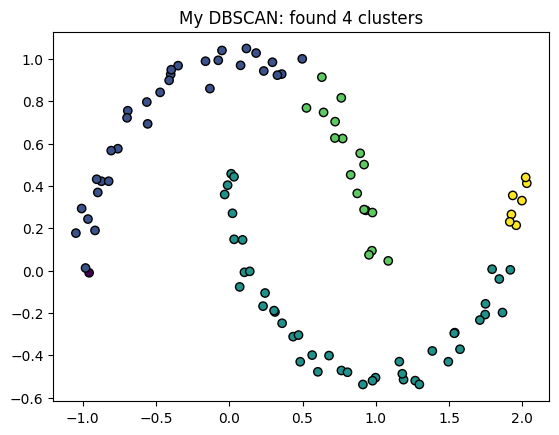

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", edgecolors="k")
plt.title(f"My DBSCAN: found {cluster_id} clusters")
plt.show()

## 3. DBSCAN from sklearn

In [14]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)

In [16]:
labels = dbscan.fit_predict(X)

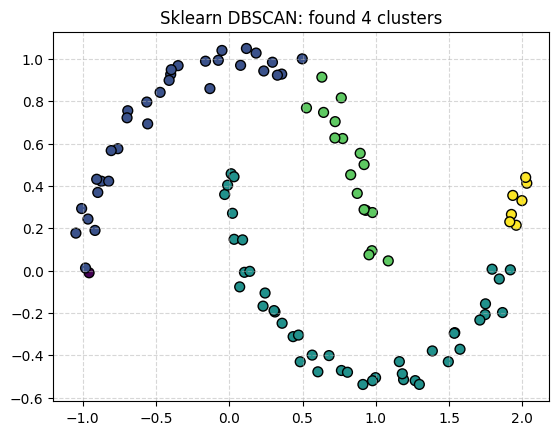

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", edgecolors="k", s=50)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)


plt.title(f"Sklearn DBSCAN: found {n_clusters} clusters")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()